In [4]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import random_clifford
from qiskit.quantum_info import Clifford

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

from qiskit.extensions import Initialize

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
from qiskit import QuantumCircuit, execute
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')
from qiskit.quantum_info.operators import Operator, Pauli

ibmqfactory.load_account:WARNING:2023-03-28 17:40:21,022: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit.circuit import Parameter
from qiskit.opflow import I, Z, X, Y
from qiskit.utils import algorithm_globals
from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.opflow import StateFn
from qiskit import BasicAer

In [322]:
"""provider=IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='skku-students')
#provider.backends()
backend= provider.get_backend('ibmq_quito')"""

"provider=IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='skku-students')\n#provider.backends()\nbackend= provider.get_backend('ibmq_quito')"

In [6]:
def My_function(x):
    qc=QuantumCircuit(2)
    qc.append(EfficientSU2(2,reps=1),[0,1])
    index=0
    for i in qc.parameters:
        qc=qc.bind_parameters({i:x[index]})
        index+=1
    state_vec=get_statevector(qc).data
    return -np.dot(state_vec,[1,0,0,1])

In [7]:
def initiallize(state):
    """def f(x):
        state=temp1[0]
        qc=temp2[0]
        index=0
        for i in qc.parameters:
            qc=qc.bind_parameters({i:x[index]})
            index+=1
        result=get_statevector(qc).data@np.array(temp1[0])
        return -result"""
    state=normalize(state)
    Dim=int(math.ceil(math.log2(len(state))))
    temp1=[abs(state)]
    """qc_iso=QuantumCircuit(Dim)
    parameter_=[Parameter(str(i)) for i in range(Dim)]
    index3=0
    for i in range(Dim):
        qc_iso.h(i)
    for i in parameter_:
        qc_iso.ry(i,index3)
        index3+=1
    temp2=[qc_iso]
    x0=np.zeros(Dim)
    res=minimize(f,x0,options={'maxiter':12})
    index4=0
    for i in qc_iso.parameters:
        qc_iso=qc_iso.bind_parameters({i:res.x[index4]})
        index4+=1
    print(qc_iso)
    init=qc_iso.to_gate(label='sudo init')"""


    qc=QuantumCircuit(Dim)
    ##qc.append(init,range(0,Dim))
    ##qc.append(EfficientSU2(Dim,reps=1,su2_gates=['ry','rz']),range(0,Dim))
    Para_list=[]
    reps=2
    for k in range(reps):
        for i in range(Dim):
            for j in range(3):
                Para_list.append(Parameter(str(i)+str(j)+str(k)))
    for k in range(reps):
        for i in range(Dim):
            Para_list.append(Parameter(str(i)+str(k)))
    index=0
    for j in range(reps):
        for i in range(Dim):
            qc.rx(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1)
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1) 
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1)
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
   ## return qc
    para_num=len(qc.parameters)
    listA=[qc]
    x_values=[]
    y_values=[]
    def call_back(x):
        x_values.append(x)
        y_values.append(My_function1(x))
        print("반복횟수:",len(x_values))
        
    def My_function1(x):
        qc=listA[0]
        """A=random_clifford(qc.num_qubits)
        A_mat=Operator(A).data
        qc.append(A,range(0,qc.num_qubits))"""
        index=0
        for i in qc.parameters:
            qc=qc.bind_parameters({i:x[index]})
            index+=1
        result=(normalize(state)).conjugate()@get_statevector(qc).data
        return -result.real
    res_x,res_y=optimize(My_function1,para_num,call_back)
    index=0
    for i in qc.parameters:
        qc=qc.bind_parameters({i:res_x[index]})
        index+=1
    return qc,x_values,y_values
def obj_func(x):
    return x[0]**2 + x[1]**2

# 콜백 함수 정의
x_values = []
def callback_func(x):
    x_values.append(x)
def optimize(f,parameter_num,callfunc):
    x_values=[]
    ##x0=np.zeros(parameter_num)
    x0=np.array([0]*parameter_num)
    x0=x0+(list(np.random.randn(int(parameter_num/4))*np.pi)+[0]*int(parameter_num*3/4))
    """ while(f(x0).real>-0.5):
        x0=np.array([0]*parameter_num)+(list(np.random.randn(int(parameter_num/4))*np.pi)+[0]*int(parameter_num*3/4))
        print(f(x0))"""
    res = minimize(f, x0, callback=callfunc,tol=1e-4,options={"maxiter":8})
    return res.x,res.fun

In [325]:
"""def parameter_circuit(state,*rep):
    if len(rep)==0:
        reps=1
    else:
        reps=rep[0]
  def f(x):
        state=temp1[0]
        qc=temp2[0]
        index=0
        for i in qc.parameters:
            qc=qc.bind_parameters({i:x[index]})
            index+=1
        result=get_statevector(qc).data@np.array(temp1[0])
        return -result
    state=normalize(state)
    Dim=int(math.ceil(math.log2(len(state))))
    temp1=[abs(state)]
    qc_iso=QuantumCircuit(Dim)
    parameter_=[Parameter(str(i)) for i in range(Dim)]
    index3=0
    for i in range(Dim):
        qc_iso.h(i)
    for i in parameter_:
        qc_iso.ry(i,index3)
        index3+=1
    temp2=[qc_iso]
    x0=np.zeros(Dim)
    res=minimize(f,x0,options={'maxiter':12})
    index4=0
    for i in qc_iso.parameters:
        qc_iso=qc_iso.bind_parameters({i:res.x[index4]})
        index4+=1
    print(qc_iso)
    init=qc_iso.to_gate(label='sudo init')


    qc=QuantumCircuit(Dim)
    ##qc.append(init,range(0,Dim))
    ##qc.append(EfficientSU2(Dim,reps=1,su2_gates=['ry','rz']),range(0,Dim))
    Para_list=[]
    for k in range(reps):
        for i in range(Dim):
            for j in range(8):
                Para_list.append(Parameter(str(i)+str(j)+str(k)))
    for k in range(reps):
        for i in range(Dim):
            Para_list.append(Parameter(str(i)+str(k)))
    index=0
    for j in range(reps):
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        ###추가
        for i in range(Dim):
            qc.h(i)
            index+=1
        ###
        ###추가
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        for i in range(Dim):
            qc.h(i)
            index+=1
        ###
        for i in range(Dim-1):
            qc.cx(i,i+1)
        ###추가
        for i in range(Dim):
            qc.h(i)
            index+=1
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        ###
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1) 
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1)
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
        return qc"""

"def parameter_circuit(state,*rep):\n    if len(rep)==0:\n        reps=1\n    else:\n        reps=rep[0]\n  def f(x):\n        state=temp1[0]\n        qc=temp2[0]\n        index=0\n        for i in qc.parameters:\n            qc=qc.bind_parameters({i:x[index]})\n            index+=1\n        result=get_statevector(qc).data@np.array(temp1[0])\n        return -result\n    state=normalize(state)\n    Dim=int(math.ceil(math.log2(len(state))))\n    temp1=[abs(state)]\n    qc_iso=QuantumCircuit(Dim)\n    parameter_=[Parameter(str(i)) for i in range(Dim)]\n    index3=0\n    for i in range(Dim):\n        qc_iso.h(i)\n    for i in parameter_:\n        qc_iso.ry(i,index3)\n        index3+=1\n    temp2=[qc_iso]\n    x0=np.zeros(Dim)\n    res=minimize(f,x0,options={'maxiter':12})\n    index4=0\n    for i in qc_iso.parameters:\n        qc_iso=qc_iso.bind_parameters({i:res.x[index4]})\n        index4+=1\n    print(qc_iso)\n    init=qc_iso.to_gate(label='sudo init')\n\n\n    qc=QuantumCircuit(Dim)\n 

In [8]:
def parameter_circuit(state,*rep):
    if len(rep)==0:
        reps=1
    else:
        reps=rep[0]
    """def f(x):
        state=temp1[0]
        qc=temp2[0]
        index=0
        for i in qc.parameters:
            qc=qc.bind_parameters({i:x[index]})
            index+=1
        result=get_statevector(qc).data@np.array(temp1[0])
        return -result"""
    state=normalize(state)
    Dim=int(math.ceil(math.log2(len(state))))
    temp1=[abs(state)]
    """qc_iso=QuantumCircuit(Dim)
    parameter_=[Parameter(str(i)) for i in range(Dim)]
    index3=0
    for i in range(Dim):
        qc_iso.h(i)
    for i in parameter_:
        qc_iso.ry(i,index3)
        index3+=1
    temp2=[qc_iso]
    x0=np.zeros(Dim)
    res=minimize(f,x0,options={'maxiter':12})
    index4=0
    for i in qc_iso.parameters:
        qc_iso=qc_iso.bind_parameters({i:res.x[index4]})
        index4+=1
    print(qc_iso)
    init=qc_iso.to_gate(label='sudo init')"""


    qc=QuantumCircuit(Dim)
    ##qc.append(init,range(0,Dim))
    ##qc.append(EfficientSU2(Dim,reps=1,su2_gates=['ry','rz']),range(0,Dim))
    Para_list=[]
    for k in range(reps):
        for i in range(Dim):
            for j in range(3):
                Para_list.append(Parameter(str(i)+str(j)+str(k)))
    for k in range(reps):
        for i in range(Dim):
            Para_list.append(Parameter(str(i)+str(k)))
    index=0
    for j in range(reps):
        for i in range(Dim):
            qc.rx(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1)
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1) 
        for i in range(Dim):
            qc.rz(Para_list[index],i)
            index+=1
        for i in range(Dim-1):
            qc.cx(i,i+1)
        for i in range(Dim):
            qc.ry(Para_list[index],i)
            index+=1
    return qc

In [9]:
def fuction1(x):
    
    Dim=1
    f=0
    for i in range(10):
        qc=QuantumCircuit(1,1)
        theta=[]
        for j in range(12):
            theta.append(Parameter('Theta'+str(j)))
        for j in range(12):
            if j<3:
                qc.rx(theta[j],0)
            elif j<6:
                qc.ry(theta[j],0)
            else:
                qc.rz(theta[j],0)
        index1=0
        for j in qc.parameters:
            qc=qc.bind_parameters({j:x[index1]})
            index1=index1+1
        data=get_statevector(qc).data
        A=Clif_gate1[i]
        A_mat=Operator(A).data
        qc.append(A,[0])
        qc.measure(0,0)
        temp=[0]*2
        job=execute(qc,backend,shots=1024)
        result=job.result()
        counts=result.get_counts(qc)
        for j in counts.keys():
            index=int(j,2)
            temp[index]=float(counts[j])
        temp1=A_mat@normalize([1,1])
        p=temp@abs((temp1))**2
        f=f+1/10240*((2**Dim+1)*p-1024)
    return f,data

In [10]:
def get_statevector(circuit):
    backend = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend).result()
    statevector = result.get_statevector(circuit)
    return statevector
def get_value(state):
    state=normalize(state)
    Dim=int(math.ceil(math.log2(len(state))))
    index=0
    number=My_binary(index,Dim)
    l=0
    for j in number:
        if l==0:
            if j=='0':
                op=I+Z
            else:
                op=I-Z
        else:
            if j=='0':
                temp=I+Z
            else:
                temp=I-Z
            op=op^temp
        l+=1
    C=op*-state[0]
    for i in state:
        if index==0:
            index+=1
        else:
            number=My_binary(index,Dim)
            k=0
            for j in number:
                if k==0:
                    if j=='0':
                        op=I+Z
                    else:
                        op=I-Z
                else:
                    if j=='0':
                        temp=I+Z
                    else:
                        temp=I-Z
                    op=op^temp
                k+=1
            C=C+op*(-i)
            index+=1
    return C

In [11]:
def normalize(state_vector):
    temp=np.array(state_vector)
    normalized_v = temp / np.sqrt(np.sum(abs(temp)**2))
    return normalized_v
def My_binary(number,full):
    def binary(number):
        if number==0:
            return '0'
        if number==1:
            return '1'
        if (number%2==0):
            return binary(number//2)+'0'
        else:
            return binary(number//2)+'1'
    temp=binary(number)
    while(len(temp)<full):
        temp='0'+temp
    return temp

In [12]:
def optimize1(f,x0,*labm1):
    if len(labm1)==0:
        labm=0.5
    else:
        labm=labm1[0]
    v=[0]*len(x0)
    index=0
    orginal=x0.copy()
    x_plus=x0.copy()
    x_minus=x0.copy()
    ###fx_plus-fx_minus
    delta_list=[]
    """if f(x0)<0.8:
        labm=0.7
    else:"""
    A=True
    for i in x0:
        delta=0
        x_plus[index]=x_plus[index]+np.pi/2
        temp1=x_plus.copy()
        x_minus[index]=x_minus[index]-np.pi/2
        temp2=x_minus.copy()
        plus=f(temp1)
        minus=f(x_minus)
        delta=labm*(plus-minus)
        x0[index]=x0[index]+delta
        x_plus=orginal.copy()
        x_minus=orginal.copy()
        index+=1
        delta_list.append(delta)
    result=f(x0)
    return result

In [331]:

"""state=np.random.rand(2**5)
qc=QuantumCircuit(5,5)
qc.initialize(normalize(state))
qc.h(0)
qc.measure(range(0,5),range(0,5))
job=execute(qc,backend=backend,shots=1000)
result=job.result()
count=result.get_counts(qc)"""

'state=np.random.rand(2**5)\nqc=QuantumCircuit(5,5)\nqc.initialize(normalize(state))\nqc.h(0)\nqc.measure(range(0,5),range(0,5))\njob=execute(qc,backend=backend,shots=1000)\nresult=job.result()\ncount=result.get_counts(qc)'

In [13]:
from scipy.optimize import minimize
"""Dim=4
qc_iso=QuantumCircuit(Dim)
parameter_=[Parameter(str(i)) for i in range(Dim)]
index3=0
for i in parameter_:
    qc_iso.ry(i,index3)
    index3+=1
temp=[qc_iso]
temp1=[state]
def f(x):
    state=temp1[0]
    qc=temp[0]
    index=0
    for i in qc.parameters:
        qc=qc.bind_parameters({i:x[index]})
        index+=1
    result=get_statevector(qc).data@np.array(temp1[0])
    return -result
x=np.zeros(16)
print(f([-np.pi/2,-np.pi/2,-np.pi/2,-np.pi/2]))
res_y=minimize(f,x,options={'maxiter':100})
print(res_y.x)"""

"Dim=4\nqc_iso=QuantumCircuit(Dim)\nparameter_=[Parameter(str(i)) for i in range(Dim)]\nindex3=0\nfor i in parameter_:\n    qc_iso.ry(i,index3)\n    index3+=1\ntemp=[qc_iso]\ntemp1=[state]\ndef f(x):\n    state=temp1[0]\n    qc=temp[0]\n    index=0\n    for i in qc.parameters:\n        qc=qc.bind_parameters({i:x[index]})\n        index+=1\n    result=get_statevector(qc).data@np.array(temp1[0])\n    return -result\nx=np.zeros(16)\nprint(f([-np.pi/2,-np.pi/2,-np.pi/2,-np.pi/2]))\nres_y=minimize(f,x,options={'maxiter':100})\nprint(res_y.x)"

In [14]:
state=normalize(np.random.rand(16))
def temp_F(x):
    qc=parameter_circuit(state,2)
    ##A=random_clifford(qc.num_qubits)
    ##c.append(A,range(0,qc.num_qubits))
    A_mat=Operator(A).data
    A_mat=A_mat.conjugate().T
    j=0
    for i in qc.parameters:
        qc=qc.bind_parameters({i:x[j]})
        j+=1
    ##result=(A_mat@normalize(state)).conjugate()@get_statevector(qc).data
    result=(normalize(state)).conjugate()@get_statevector(qc).data
    return result

In [15]:
import cmath
def fuction(state,para,Clif_list,qc_list):
    Dim=math.ceil(math.log2(len(state)))
    """qc_list=[]
    Clif_list=[0]*100
    for i in range(100):
        qc=QuantumCircuit(Dim,Dim)
        qc.append(EfficientSU2(Dim,reps=1),range(0,Dim))
        A=random_clifford(Dim)
        Clif_list[i]=A
        A=Operator(A)
        qc_iso=QuantumCircuit(Dim)
        qc_iso.append(A,range(0,Dim))
        Clif_gate=qc_iso.to_gate()
        Clif_gate.label="Clif"+str(i)
        qc.append(Clif_gate,range(0,Dim))
        qc.measure(range(0,Dim),range(0,Dim))
        qc_list.append(qc)"""
    state=normalize(state)
    Observe=np.outer(state,state)
    bind_qc=[]
    tem_list=[0]
    tem_list[0]=qc_list[0]
    for i in tem_list:
        index=0
        for j in i.parameters:
            i=i.bind_parameters({j:para[index]})
            index+=1
        bind_qc.append(i)
    f=0
    backend=Aer.get_backend('aer_simulator')
    for i in range(len(Clif_list)):
        temp=[0]*2**Dim
        job=execute(bind_qc[i],backend,shots=512)
        result=job.result()
        counts=result.get_counts(bind_qc[i])
        for j in counts.keys():
            index=int(j,2)
            temp[index]=float(counts[j])
        A_mat=Operator(Clif_list[i]).data
        A_mat_dagger=A_mat.conjugate().T
        temp1=A_mat@state
        temp=np.array(temp).conjugate()
        p=temp@abs(temp1)**2
        f=f+1/(len(Clif_list)*512)*((2**Dim+1)*p-512)
    """for i in range(10):
        temp=[0]*Dim**2
        job=execute(bind_qc[i],backend,shots=1024)
        result=job.result()
        counts=result.get_counts(bind_qc[i])
        for j in counts.keys():
            index=int(j,2)
            temp[index]=float(counts[j])
        temp=normalize(temp)
        A_mat=Operator(Clif_list[i]).data
        A_mat_dagger=A_mat.conjugate().T
        temp1=A_mat@state
        p=abs(temp@temp1)**2
        listA.append(p)
        f=f+1/10*((2**Dim+1)*p-1)"""
    return f
def list_phase(x):
    all1=0
    for i in x:
        all1=all1+i
    av=all1/len(x)
    phase=complex(0,cmath.phase(np.sum(x)/len(x)))
    asd=cmath.exp(-phase)
    return x*asd

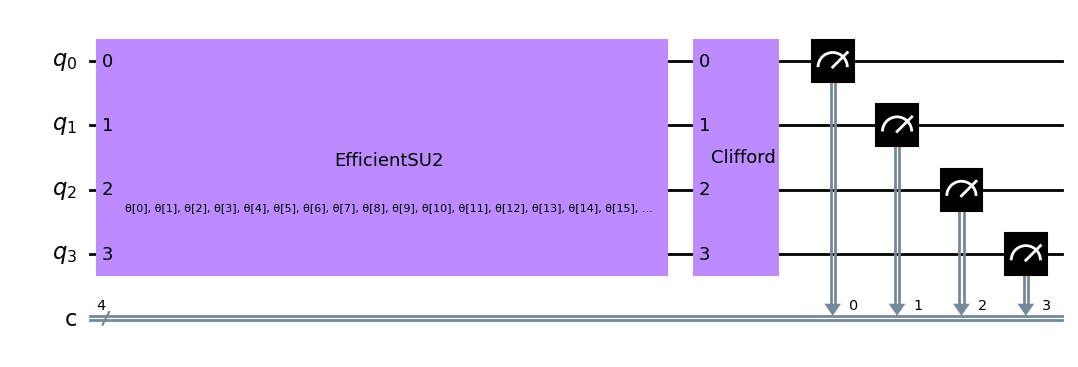

In [44]:
###shadow 개수 조절
Shadow_num=20
###Dimension 조절 2^D
Dim=4
##Paramter, Circuit depth 조절
rep=2
qc_list=[]
Clif_list=[0]*Shadow_num
for i in range(Shadow_num):
    qc=QuantumCircuit(Dim,Dim)
    qc.append(EfficientSU2(Dim,reps=rep),range(0,Dim))
    A=random_clifford(Dim)
    A=Operator(A)
    qc_iso=QuantumCircuit(Dim)
    qc_iso.append(A,range(0,Dim))
    Clif_gate=qc_iso.to_gate()
    Clif_gate.label="Clifford"
    Clif_list[i]=Clif_gate
    qc.append(Clif_gate,range(0,Dim))
    qc.measure(range(0,Dim),range(0,Dim))
    qc_list.append(qc)
for j in qc_list:
    A=j.parameters
    for k in A:
        j=j.bind_parameters({k:1})
qc.draw(output = 'mpl')

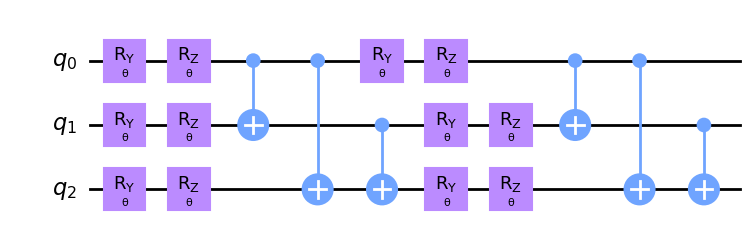

In [52]:
theta=Parameter('θ')
qc = QuantumCircuit(3)  # create a circuit and append the RY variational form
qc.ry(theta,0)
qc.ry(theta,1)
qc.ry(theta,2)
qc.rz(theta,0)
qc.rz(theta,1)
qc.rz(theta,2)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(1,2)
qc.ry(theta,0)
qc.ry(theta,1)
qc.ry(theta,2)
qc.rz(theta,0)
qc.rz(theta,1)
qc.rz(theta,2)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(1,2)
qc.draw(output='mpl')

In [17]:
def find_shadow(state,Clif_list):
    print(len(Clif_list))
    state=normalize(state)
    max=0
    Prob_max=0
    max_shadow=Clif_list[0]
    for i in Clif_list:
        A_mat=Operator(i).data
        Prob=abs(A_mat@state)**2
        if(max<np.sum(Prob**2)):
            max=np.sum(Prob**2)
            max_shadow=i
    return Operator(max_shadow).data@state,max

In [18]:
###state 넣고 싶은거 넣는곳
##state=np.random.randn(2**Dim)
###itteration 횟수 조절
it=10

In [39]:
"""A=[[] for j in range(4)]
state=[1]+[0]*14+[1]
state=normalize(state)
itter=[]
state_list=[[] for j in range(4)]
x0_list=[[] for j in range(4)]
fid_list=[[] for j in range(4)]"""
A=[]
x0_list=[]
itter=[]
temp_list=[0]
temp_list[0],max1=find_shadow(state,Clif_list)
## 작동안되면 이거 값 바꾸기 16이나 24나 32 넣기
init=24
for i in qc_list[1].parameters:
    init+=1
##x0=np.zeros(init)
"""for j in range(4):
    itter=[]
    x0=np.zeros(8)
    state=np.random.rand(4)
    state_list[j].append(state)"""

for i in range(it):
    def fuction1(para):
        return fuction(state,para,temp_list,qc_list)
    print(f"돌아간 횟수: {i}")
    A.append(optimize1(fuction1,x0,0.5))
    x0_list.append(x0)
    itter.append(i)                                                                                                                                
plt.plot(itter,A,label=f"state{0}")
plt.legend(loc='upper right')
plt.xlabel("itter")
plt.ylabel("fidelity")

20
돌아간 횟수: 0


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [23]:
##최적화 결과 확인
qc=QuantumCircuit(Dim)
qc.append(EfficientSU2(Dim,reps=rep),range(0,Dim))
index=0
for j in qc.parameters:
    ##qc=qc.bind_parameters({j:x0_list[it-1][index]})
    ##qc=qc.bind_parameters({j:temp[index]})
    qc=qc.bind_parameters({j:x0[index]})
    index=index+1
### fidelity 낮게 나오면 밑에꺼 주석처리하고
print(f"Qubit 수 : {Dim}, Shadow 수 : {Shadow_num}, reps 수={rep}")
print(f"state{0} Fidelity:",(list_phase((get_statevector(qc).data))@np.array(normalize(state))))
### 이거 주석 삭제하고 다시 해보기
###print(f"state{0} Fidelity:",abs(((get_statevector(qc).data)@np.array(normalize(state)))))
print(f"q_state{0}:{-np.round((((list_phase((get_statevector(qc).data))))),4)} state{0}: {normalize(state)} ")

Qubit 수 : 4, Shadow 수 : 20, reps 수=2
state0 Fidelity: (0.18576489133544172+0j)
q_state0:[-1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j
 -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j] state0: [0.18576489 0.0937393  0.40291219 0.27106777 0.10662155 0.0917925
 0.19260638 0.41249556 0.28995494 0.01001552 0.34915054 0.19928052
 0.31448088 0.26437894 0.151101   0.23754072] 


In [24]:
"""for i in range(4):
    qc=QuantumCircuit(2)
    qc.append(EfficientSU2(2,reps=1),range(0,2))
    index=0
    temp=np.random.rand(8)
    for j in qc.parameters:
        qc=qc.bind_parameters({j:x0_list[i][3][index]})
        ##qc=qc.bind_parameters({j:temp[index]})
        ##qc=qc.bind_parameters({j:x0[index]})
        index=index+1
    
    print(f"state{i} Fidelity:",(list_phase(get_statevector(qc)).data@np.array(normalize(state_list[i][0]))).real)
    print(f"q_state{i}:{np.round(list_phase(get_statevector(qc)).data,4).real} state{i}: {normalize(state_list[i][0])} ")"""

'for i in range(4):\n    qc=QuantumCircuit(2)\n    qc.append(EfficientSU2(2,reps=1),range(0,2))\n    index=0\n    temp=np.random.rand(8)\n    for j in qc.parameters:\n        qc=qc.bind_parameters({j:x0_list[i][3][index]})\n        ##qc=qc.bind_parameters({j:temp[index]})\n        ##qc=qc.bind_parameters({j:x0[index]})\n        index=index+1\n    \n    print(f"state{i} Fidelity:",(list_phase(get_statevector(qc)).data@np.array(normalize(state_list[i][0]))).real)\n    print(f"q_state{i}:{np.round(list_phase(get_statevector(qc)).data,4).real} state{i}: {normalize(state_list[i][0])} ")'

In [25]:
list_phase(get_statevector(qc).data),normalize(state_list[3][0])

NameError: name 'state_list' is not defined

In [26]:
def list_phase(x):
    all1=0
    for i in x:
        all1=all1+i
    av=all1/4
    phase=complex(0,cmath.phase(np.sum(tem/abs(tem))/4))
    asd=cmath.exp(phase)
    return x*asd

In [27]:
qc=QuantumCircuit(2)
i=2
qc.append(EfficientSU2(2,reps=1),range(0,2))
index=0
##x0=[np.pi]*16 
for j in qc.parameters:
    qc=qc.bind_parameters({j:x0_list[i][3][index]})
    index=index+1
get_statevector(qc).data,normalize(state_list[i][0])

IndexError: list index out of range

In [28]:
import cmath
tem=get_statevector(qc).data
np.sum(tem/abs(tem))/4
phase=complex(0,cmath.phase(np.sum(tem/abs(tem))/4))
asd=cmath.exp(phase)

QiskitError: 'Mismatch between run_config.parameter_binds and all circuit parameters. Parameter binds: [] Circuit parameters: [ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7])])]'

In [29]:
print(abs(get_statevector(qc).data@np.array(normalize(state_list[1]))))

QiskitError: 'Mismatch between run_config.parameter_binds and all circuit parameters. Parameter binds: [] Circuit parameters: [ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7])])]'

In [30]:
qc=QuantumCircuit(2)
qc.append(EfficientSU2(2,reps=1),range(0,2))
index=0
##x0=[np.pi]*16 
for i in qc.parameters:
    qc=qc.bind_parameters({i:x0[index]})
    index=index+1
qc.draw()

┌────────────────────────────────────────────────┐
q_0: ┤0                                               ├
     │  EfficientSU2(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0) │
q_1: ┤1                                               ├
     └────────────────────────────────────────────────┘

In [31]:
print(x0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [32]:
get_statevector(qc)
print(abs(get_statevector(qc).data@np.array(normalize([1, 1 , 0, 1]))))

0.5773502691896258


In [33]:
abs((get_statevector(qc).data))

array([1., 0., 0., 0.])

In [34]:
abs(normalize([1,0,1,1])@(get_statevector(qc).data))

0.5773502691896258

In [35]:
qc,x,y=initiallize(state)
itter=[]
index=0
for i in y:
    itter.append(index)
    index+=1
y=np.array(y)
plt.plot(itter,-y)
plt.xlabel("itter")
plt.ylabel("fidelity")

반복횟수: 1
반복횟수: 2
반복횟수: 3
반복횟수: 4
반복횟수: 5
반복횟수: 6
반복횟수: 7


KeyboardInterrupt: 

In [ ]:
def fuction1(para):
    return fuction([0,0,1,1],para,Clif_list,qc_list)

In [ ]:

x = tf.Variable(0.0)
print(float(x))

In [ ]:
def get_value(state):
    state=normalize(state)
    Dim=int(math.ceil(math.log2(len(state))))
    index=0
    number=My_binary(index,Dim)
    l=0
    for j in number:
        if l==0:
            if j=='0':
                op=I+Z
            else:
                op=I-Z
        else:
            if j=='0':
                temp=I+Z
            else:
                temp=I-Z
            op=op^temp
        l+=1
    C=op*-state[0]
    for i in state:
        if index==0:
            index+=1
        else:
            number=My_binary(index,Dim)
            k=0
            for j in number:
                if k==0:
                    if j=='0':
                        op=I+Z
                    else:
                        op=I-Z
                else:
                    if j=='0':
                        temp=I+Z
                    else:
                        temp=I-Z
                    op=op^temp
                k+=1
            C=C+op*(-i)
            index+=1
    return C


In [ ]:
qc_list=[]
Clif_list=[0]*1000
for i in range(1000):
    qc=QuantumCircuit(Dim,Dim)
    qc.append(EfficientSU2(Dim,reps=1),range(0,Dim))
    A=random_clifford(Dim)
    A=Operator(A)
    qc_iso=QuantumCircuit(Dim)
    qc_iso.cx(0,1)
    qc_iso.append(A,range(0,Dim))
    Clif_gate=qc_iso.to_gate()
    Clif_gate.label="Clif"+str(i)
    Clif_list[i]=Clif_gate
    qc.append(Clif_gate,range(0,Dim))
    qc.measure(range(0,Dim),range(0,Dim))
    qc_list.append(qc)
for j in qc_list:
    A=j.parameters
    for k in A:
        j=j.bind_parameters({k:1})

In [ ]:
h_V=get_value(state)
qi = QuantumInstance(BasicAer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
qc_temp=QuantumCircuit(4)
slsqp = SLSQP(maxiter=1000)
qc_temp.append(EfficientSU2(4,reps=2),range(0,4))
ansatz=StateFn(qc_temp)
vqe = VQE(operator=h_V, var_form=qc_temp, optimizer=slsqp, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(operator=h_V)

In [ ]:
state=[0,0,1,1]
Dim=math.ceil(math.log2(len(state)))
state=normalize(state)
Observe=np.outer(state,state)
qc_list=[]
Clif_list=[0]*1000
for i in range(1000):
    qc=QuantumCircuit(Dim,Dim)
    qc.append(EfficientSU2(Dim,reps=1),range(0,Dim))
    A=random_clifford(Dim)
    Clif_list[i]=A
    A=Operator(A)
    qc_iso=QuantumCircuit(Dim)
    if i<500:
        qc_iso.cx(0,1)
    qc_iso.append(A,range(0,Dim))
    Clif_gate=qc_iso.to_gate()
    Clif_gate.label="Clif"+str(i)
    qc.append(Clif_gate,range(0,Dim))
    qc.measure(range(0,Dim),range(0,Dim))
    qc_list.append(qc)
for j in qc_list:
    A=j.parameters
    for k in A:
        j=j.bind_parameters({k:1})

In [ ]:
print(Operator(Clif_list[2]).data)

[[0.+0.5j 0.-0.5j 0.-0.5j 0.+0.5j]
 [0.+0.5j 0.-0.5j 0.+0.5j 0.-0.5j]
 [0.+0.5j 0.+0.5j 0.-0.5j 0.-0.5j]
 [0.+0.5j 0.+0.5j 0.+0.5j 0.+0.5j]]


In [ ]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
backend=Aer.get_backend('aer_simulator')
for i in range(10):
    job=execute(qc,backend,shots=1000)
    result=job.result()
    count=result.get_counts(qc)
    print(count['0']/1000)

0.487
0.487
0.512
0.512
0.494
0.498
0.51
0.507
0.509
0.507


In [ ]:
fuction([1,0,0,1],2*[0]+[-np.pi/2]+[0]*13,Clif_list,qc_list)

1.1394042968749978

In [ ]:
qc=QuantumCircuit(3)
qc.append(EfficientSU2(3,reps=1),range(0,3))
A=qc.parameters
for j in qc_list:
    for i in j.parameters:
        j=j.bind_parameters({i:1})
    


In [ ]:
state=[1,0,1,1]
state=normalize(state)
A_mat=Operator(Clif_list[7]).data
A_mat_dagger=A_mat.conjugate().T
temp1=A_mat@state

In [ ]:
abs(temp1)**2

array([0.        , 0.16666667, 0.16666667, 0.66666667])

In [ ]:
print(5*np.array([0,0,1,0])@abs(temp1)**2-1)

-0.16666666666666685


In [ ]:
qc=QuantumCircuit(2)
qc.append(Clif_list[3],[0,1])
get_statevector(qc)

In [ ]:
def fuction(state,para,Clif_list,qc_list):
    Dim=math.ceil(math.log2(len(state)))
    """qc_list=[]
    Clif_list=[0]*100
    for i in range(100):
        qc=QuantumCircuit(Dim,Dim)
        qc.append(EfficientSU2(Dim,reps=1),range(0,Dim))
        A=random_clifford(Dim)
        Clif_list[i]=A
        A=Operator(A)
        qc_iso=QuantumCircuit(Dim)
        qc_iso.append(A,range(0,Dim))
        Clif_gate=qc_iso.to_gate()
        Clif_gate.label="Clif"+str(i)
        qc.append(Clif_gate,range(0,Dim))
        qc.measure(range(0,Dim),range(0,Dim))
        qc_list.append(qc)"""
    state=normalize(state)
    Observe=np.outer(state,state)
    bind_qc=[]
    for i in qc_list:
        index=0
        for j in i.parameters:
            i=i.bind_parameters({j:para[index]})
            index+=1
        bind_qc.append(i)
    f=0
    backend=Aer.get_backend('aer_simulator')
    for i in range(100):
        temp=[0]*Dim**2
        job=execute(bind_qc[i],backend,shots=1024)
        result=job.result()
        counts=result.get_counts(bind_qc[i])
        for j in counts.keys():
            index=int(j,2)
            temp[index]=float(counts[j])
        A_mat=Operator(Clif_list[i]).data
        A_mat_dagger=A_mat.conjugate().T
        temp1=A_mat@state
        temp=np.array(temp).conjugate()
        p=temp@abs(temp1)**2
        f=f+1/(100*1024)*((2**Dim+1)*p-1024)
    """for i in range(10):
        temp=[0]*Dim**2
        job=execute(bind_qc[i],backend,shots=1024)
        result=job.result()
        counts=result.get_counts(bind_qc[i])
        for j in counts.keys():
            index=int(j,2)
            temp[index]=float(counts[j])
        temp=normalize(temp)
        A_mat=Operator(Clif_list[i]).data
        A_mat_dagger=A_mat.conjugate().T
        temp1=A_mat@state
        p=abs(temp@temp1)**2
        listA.append(p)
        f=f+1/10*((2**Dim+1)*p-1)"""
    return f



    

In [ ]:
fuction1(x0)

NameError: name 'fuction1' is not defined

In [ ]:
def fuction1(para):
    return fuction([1,0,0,1],para,Clif_list,qc_list)

In [ ]:
qc_list=[]
qc_list_list_=[[] for _ in range(12)]
qc_list_list__=[[] for _ in range(12)]
for i in range(100):
    qc=QuantumCircuit(3,3)
    qc.append(EfficientSU2(3,reps=1),range(0,3))
    A=random_clifford(3)
    qc.append(A,range(0,3))
    qc.measure(range(0,3),range(0,3))
    for j in qc.parameters:
        qc=qc.bind_parameters({j:2.321})
    qc_list.append(qc)
for k in range(12):
    num=0
    for i in range(100):
        qc_=QuantumCircuit(3,3)
        qc_.append(EfficientSU2(3,reps=1),range(0,3))
        A=random_clifford(3)
        qc_.append(A,range(0,3))
        qc_.measure(range(0,3),range(0,3))
        for j in qc_.parameters:
            if num==k:
                qc_=qc_.bind_parameters({j:2.321+np.pi})
            else:
                qc_=qc_.bind_parameters({j:2.321})
        qc_list_list_[k].append(qc_)
for k in range(12):
    num=0
    for i in range(100):
        qc__=QuantumCircuit(3,3)
        qc__.append(EfficientSU2(3,reps=1),range(0,3))
        A=random_clifford(3)
        qc__.append(A,range(0,3))
        qc__.measure(range(0,3),range(0,3))
        for j in qc__.parameters:
            if num==k:
                qc__=qc__.bind_parameters({j:2.321-np.pi})
            else:
                qc__=qc__.bind_parameters({j:2.321})
        qc_list_list__[k].append(qc__) 